In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import squareform, pdist
import timeit
import random
from math import exp,sqrt,pi,e
from scipy.optimize import curve_fit
from IPython.display import HTML
from matplotlib import animation

In [92]:
def Initialization() : #gas
    global N 
    global L
    N = 100
    L = 30
    v_max = 10
    dots = []
    for i in range(1 , 11) :
        for j in range(1 , 11) :
            dots.append([(L/20)*j, (L/10)*i, np.random.uniform(-v_max,v_max), np.random.uniform(-v_max,v_max)])
        
    dots = np.array(dots)     
    v_cmx = np.mean(dots[:,2]) 
    v_cmy = np.mean(dots[:,3]) 
    dots[:,2] = dots[:,2] - v_cmx
    dots[:,3] = dots[:,3] - v_cmy
    return(dots)

In [93]:
global dots
dots = Initialization() 

In [68]:
def Initialization() : #liquid
    global N 
    global L
    N = 100
    L = 30
    v_max = 0.108
    dots = []
    for i in range(1 , 11) :
        for j in range(1 , 11) :
            dots.append([(L/20)*j, (L/10)*i, np.random.uniform(-v_max,v_max), np.random.uniform(-v_max,v_max)])
        
    dots = np.array(dots)     
    v_cmx = np.mean(dots[:,2]) 
    v_cmy = np.mean(dots[:,3]) 
    dots[:,2] = dots[:,2] - v_cmx
    dots[:,3] = dots[:,3] - v_cmy
    return(dots)

In [69]:
global dots
dots = Initialization() 

In [87]:
def Initialization() : #solid
    global N 
    global L
    N = 100
    L = 30
    #v_max = 0.01
    #v_max = 0.005
    #v_max = 0.0005
    #v_max = 0.00001
    v_max = 0.00000001
    dots = []
    for i in range(1 , 11) :
        for j in range(1 , 11) :
            dots.append([(L/20)*j, (L/10)*i, np.random.uniform(-v_max,v_max), np.random.uniform(-v_max,v_max)])
        
    dots = np.array(dots)     
    v_cmx = np.mean(dots[:,2]) 
    v_cmy = np.mean(dots[:,3]) 
    dots[:,2] = dots[:,2] - v_cmx
    dots[:,3] = dots[:,3] - v_cmy
    return(dots)

In [88]:
global dots
dots = Initialization() 

In [56]:
def Compute_Forces() :
    
    r_cutoff = 2.5
    a_x = np.zeros(N)
    a_y = np.zeros(N)
    ene_pot = np.zeros(N) #potential energy
    pot_en = 0 #potential energy
    virial = 0
    
    for i in range(N-1):
        for j in range(i+1,N):
            x_ij = dots[:,0][i] - dots[:,0][j]
            y_ij = dots[:,1][i] - dots[:,1][j] 
            
            if abs(x_ij) > r_cutoff and x_ij > L/2:
                x_ij -= L     
            if abs(x_ij) > r_cutoff and x_ij < -L/2:
                x_ij += L  
                      
            if abs(y_ij) > r_cutoff and y_ij > L/2:
                y_ij -= L
            if abs(y_ij) > r_cutoff and y_ij < -L/2:
                y_ij += L
                
            r = np.sqrt(x_ij**2 + y_ij**2)
            r_2 = r*r
            r_6 = r_2*r_2*r_2
            r_12 = r_6*r_6
            
            rc_2 = r_cutoff*r_cutoff
            rc_6 = rc_2*rc_2*rc_2
            rc_12 = rc_6*rc_6
            
            if r < r_cutoff:
              
                dU = -4*((6/r_6 - 12/r_12))/r_2
                virial +=  dU*r 
                
                a_x[i] +=  dU*x_ij
                a_x[j] -=  dU*x_ij
                
                a_y[i] +=  dU*y_ij
                a_y[j] -=  dU*y_ij
                
                U = ((4 /r_12 - 4 /r_6) - (4 /rc_12 - 4 /rc_6)) #Lenard jones potential
                
                ene_pot[i] += U/2 
                ene_pot[j] += U/2 
                
    return(a_x,a_y)

In [57]:
def Check_CM_velocity():
    vx_cm = np.mean(dots[:,2])
    vy_cm = np.mean(dots[:,3])
    dots[:,2] = dots[:,2] - vx_cm
    dots[:,3] = dots[:,3]- vy_cm

In [94]:
def update():
    Time = 100
    h = 10**(-3) 
    KB = 1/120
    density = N/(L*L)
    for t in range(1 , Time) :
        n = 0 
        a_x ,a_y = Compute_Forces()
    
        dots[:,0] += dots[:,2]*h + 0.5*a_x*h**2

        for i in range(N):
            if dots[:,0][i]>= L:
                dots[:,0][i] = dots[:,0][i] % L
            elif dots[:,0][i] < 0:
                dots[:,0][i] = L - abs(dots[:,0][i])%L
            
        dots[:,1] += dots[:,3]*h + 0.5*a_y*h**2 

        for i in range(N):
            if dots[:,1][i]>= L:
                dots[:,1][i] = dots[:,1][i] % L
            elif dots[:,1][i] < 0:
                dots[:,1][i] = L - abs(dots[:,1][i])%L

        dots[:,2] +=  0.5*a_x*h #v_x
        dots[:,3] +=  0.5*a_y*h #v_y
        Check_CM_velocity() 
    
        #Update acceleration and forces
        a_x ,a_y = Compute_Forces()
    
        dots[:,2] +=  0.5*a_x*h #v_x
        dots[:,3] +=  0.5*a_y*h #v_y
        Check_CM_velocity()

In [90]:
def animate(i):
    update()
    line.set_data(dots[:,0], dots[:,1])
    ax.set_title('step = %s' %i)
    return line,

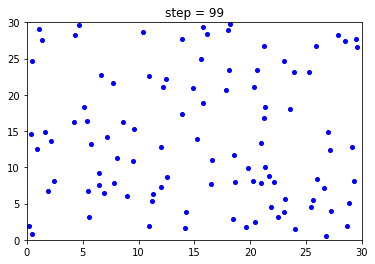

In [60]:
fig, ax = plt.subplots() #gas (time = 20)

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

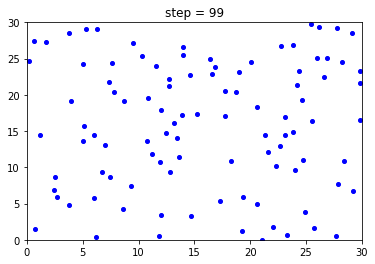

In [95]:
fig, ax = plt.subplots() #gas (time = 100)

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

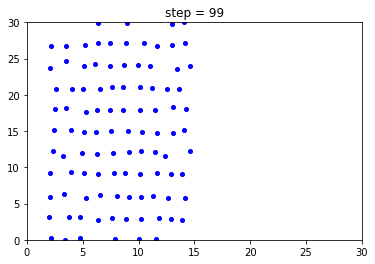

In [70]:
fig, ax = plt.subplots() #liquid

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

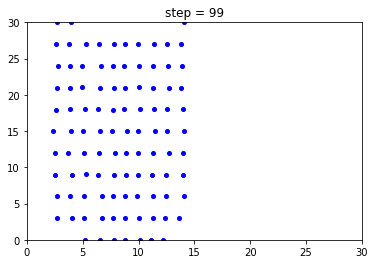

In [74]:
fig, ax = plt.subplots() #solid #v_max = 0.01

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

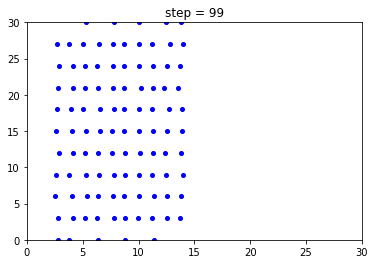

In [77]:
fig, ax = plt.subplots() #solid #v_max = 0.005

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

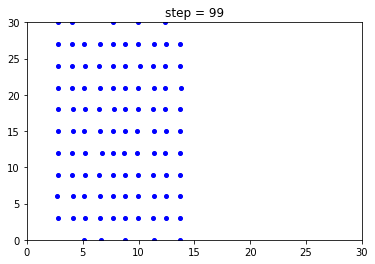

In [80]:
fig, ax = plt.subplots() #solid #v_max = 0.0005

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

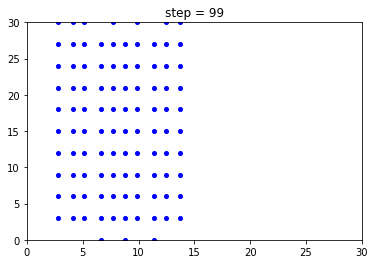

In [83]:
fig, ax = plt.subplots() #solid v_max = 0.00001

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

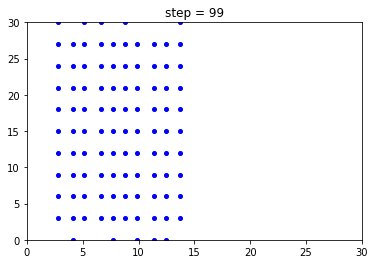

In [86]:
fig, ax = plt.subplots() #solid v_max = 0.00000001 #time = 20

ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())

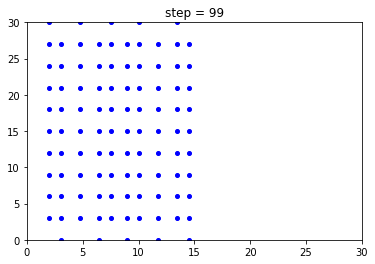

In [91]:
fig, ax = plt.subplots() #solid v_max = 0.00000001 #time = 50
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)

line, = ax.plot([], [], 'b.', ms=8)

ani = animation.FuncAnimation(fig, animate, interval=50, blit=False)

from IPython.display import HTML
HTML(ani.to_jshtml())